In [2]:
!pip install Keras

In [6]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 


In [8]:
# let us define the encoding dimention
encoding_dim = 64

In [11]:
input_img = Input(shape=(784,))# our image is 28*28
# encoded layer will be dense layer
encoded = Dense(encoding_dim , activation='relu')(input_img) # this will be applied on the previous layer
decoded = Dense(784 , activation ='sigmoid')(encoded)  ## output is same as input thats why 784

#now we are building the auto encoder model
autoencoder = Model(input_img,decoded) ## providing the imnput and output layer

#now we create an encoder model
encoder = Model(input_img,encoded)

##a place holder for encoded input is created
encoded_input = Input(shape=(encoding_dim,))

## extracting the last layer from auto encoder
decoder_layer = autoencoder.layers[-1]


## creating a decoder model
decoder = Model(encoded_input , decoder_layer(encoded_input))

In [21]:
##compiling the model
autoencoder.compile(optimizer='adam',loss = 'binary_crossentropy')

In [22]:
#load mnist dataset
#incase of auto encoders input is same as the output so we will not need the y values
(x_train,_),(x_test,_)=mnist.load_data()

## data normalization

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## reshaping to 784
x_train = x_train.reshape((len(x_train),(np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test),(np.prod(x_test.shape[1:]))))

print(f'x_train shape={x_train.shape}')
print(f'x_test shape={x_test.shape}')

x_train shape=(60000, 784)
x_test shape=(10000, 784)


In [23]:
## fiting the data in auto encoder model

autoencoder.fit(x_train,x_train, epochs=50 , batch_size = 256 , shuffle = True, validation_data = (x_test,x_test))

Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2393 - val_loss: 0.1626
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1437 - val_loss: 0.1264
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1181 - val_loss: 0.1086
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1040 - val_loss: 0.0975
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0949 - val_loss: 0.0901
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0886 - val_loss: 0.0851
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0842 - val_loss: 0.0815
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0811 - val_loss: 0.0791
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0790 - val_loss: 0.0775
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0776 - val_lo

In [24]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

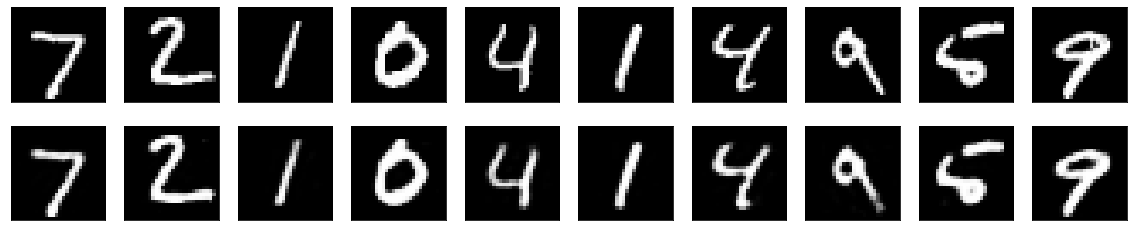

In [25]:
n = 10
plt.figure(figsize = (20,4))

for i in range(n):
     ax = plt.subplot(2,n,i+1)
     plt.imshow(x_test[i].reshape(28,28))
     plt.gray()
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)

     ax = plt.subplot(2,n,i+1+n)
     plt.imshow(decoded_imgs[i].reshape(28,28))
     plt.gray()
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)

plt.show()
